In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [36]:
FILE = './data/model_metrics/toy.csv'
df = pd.read_csv(FILE, index_col=0)

In [37]:
df.head()

,MODEL_TYPE,FILE_NAME,NUM_NODES,PARTITION_ID,METHOD,NUM_PARTITIONS,GEN_PARTITION,NVI,NMI,RAND_IDX,t1,t2
0,toy,./data/toy/graph3+1+3.net,7,1,Garvin-Newman,1,True,0.680807,0.483921,0.714286,0.056634,0.000262
1,toy,./data/toy/graph3+1+3.net,7,1,Asyn-Fluid,1,True,0.786386,0.280374,0.809524,0.056634,0.000372
2,toy,./data/toy/graph3+1+3.net,7,1,Label-Propagation,1,True,0.809540,0.165133,0.857143,0.056634,0.000431
3,toy,./data/toy/graph3+1+3.net,7,1,CN-Moore,1,True,0.809540,0.165133,0.857143,0.056634,0.000482
4,toy,./data/toy/20x2+5x2.net,50,1,Garvin-Newman,1,True,0.467548,0.694902,0.673469,3.619284,0.006751


In [ ]:
by_method_fn

In [43]:
## calculate the average time taken for t1 and t2 per NUM_NODES
avg_time = df.groupby(['NUM_NODES', 'METHOD'])[['t1','t2']].mean()
avg_time

t1        t2
NUM_NODES METHOD                               
7         Asyn-Fluid         0.056634  0.000372
          CN-Moore           0.056634  0.000482
          Garvin-Newman      0.056634  0.000262
          Label-Propagation  0.056634  0.000431
8         Asyn-Fluid         0.016747  0.000578
          CN-Moore           0.016747  0.000644
          Garvin-Newman      0.016747  0.000495
          Label-Propagation  0.016747  0.000614
9         Asyn-Fluid         0.013692  0.000672
          CN-Moore           0.013692  0.000733
          Garvin-Newman      0.013692  0.000596
          Label-Propagation  0.013692  0.000706
36        Asyn-Fluid         0.247307  0.006179
          CN-Moore           0.247307  0.006279
          Garvin-Newman      0.247307  0.006058
          Label-Propagation  0.247307  0.006229
50        Asyn-Fluid         3.619284  0.006895
          CN-Moore           3.619284  0.006989
          Garvin-Newman      3.619284  0.006751
          Label-Propagation  3.619284  0.006945

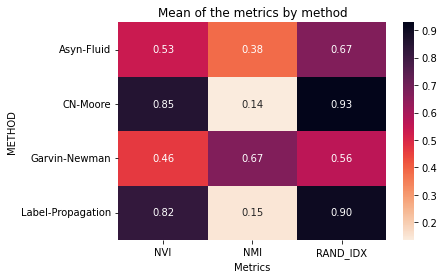

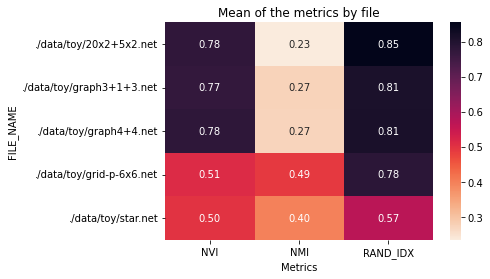

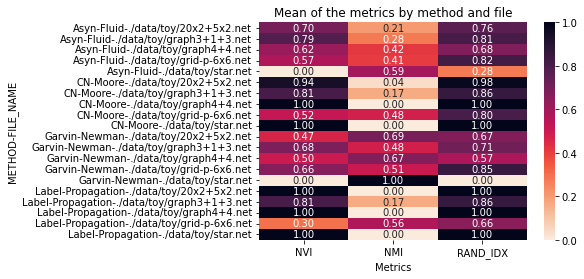

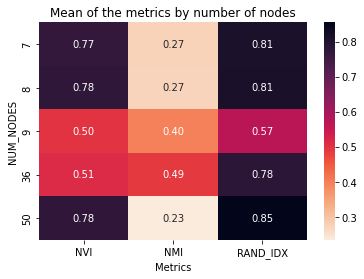

In [39]:
## HEATMAPS

## plot the errors by the methods with a heatmap 
# first get the data
metric_cols = ['NVI','NMI','RAND_IDX']
by_method = df.groupby(['METHOD']).mean()[metric_cols]
by_fn = df.groupby(['FILE_NAME']).mean()[metric_cols]
by_method_fn = df.groupby(['METHOD','FILE_NAME']).mean()[metric_cols]
by_nodes = df.groupby(['NUM_NODES']).mean()[metric_cols]
## plot the data
import seaborn as sns 
## heatmap with a cmap from green (low values) to red (high values)
ax = sns.heatmap(by_method, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.xlabel('Metrics')
plt.title("Mean of the metrics by method")
plt.show()
ax = sns.heatmap(by_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.xlabel('Metrics')
plt.title("Mean of the metrics by file")
plt.show()
axs = sns.heatmap(by_method_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.xlabel('Metrics')
plt.title("Mean of the metrics by method and file")
plt.show()
axs = sns.heatmap(by_nodes, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.xlabel('Metrics')
plt.title("Mean of the metrics by number of nodes")
plt.show()

In [ ]:
df.head()

In [ ]:
### BARPLOTS 
# first get the data
metric_cols = ['NVI','NMI','RAND_IDX']
by_method = df.groupby(['METHOD']).mean()[metric_cols]
by_fn = df.groupby(['FILE_NAME']).mean()[metric_cols]
by_method_fn = df.groupby(['METHOD','FILE_NAME']).mean()[metric_cols]
by_nodes = df.groupby(['NODES']).mean()[metric_cols]

by_method.plot(kind='bar')
plt.show()
by_fn.plot(kind='bar')
plt.show()
by_method_fn.plot(kind='bar')
plt.show()
